In [1]:
from GPUCBAgent_Continuous import GPUCBAgent
from GPThompson_Continuous import GPThompson
from StochasticPricingEnvironment import StochasticPricingEnvironment
import numpy as np 
import matplotlib.pyplot as plt
import scipy

In [7]:
min_price, max_price = 0, 1
n_customers = 100
cost = 0.1
T = 200

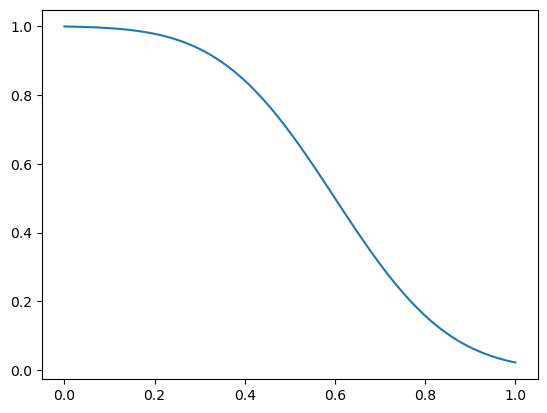

In [3]:
# conversion prob
conversion_probability = lambda p: scipy.stats.norm.cdf(5*(1-p)-2,0,1)

In [4]:
# reward function
def reward_function(price, n_sales):
    return (price-cost)*n_sales
maximum_profit = reward_function(max_price, n_customers)

# profit curve
def profit_curve(price):
    return reward_function(price, n_customers*conversion_probability(price))

def profit_curve_obj(price):
    return 1/reward_function(price, n_customers*conversion_probability(price))

In [5]:
expected_clairvoyant_rewards = []

best_price = scipy.optimize.minimize(profit_curve_obj, x0 = 0.5, bounds = [(0, 1)])
print(f'Optimization procedure ended with success: {best_price.success}.\nBest price = {best_price.x[0]}.')
expected_clairvoyant_rewards = np.repeat(profit_curve(best_price.x[0]), T)

Optimization procedure ended with success: True.
Best price = 0.4976012174218717.


In [6]:
UCB_agent = GPUCBAgent(T)
#Thom_agent = GPThompson(T)
env = StochasticPricingEnvironment(conversion_probability=conversion_probability, cost=cost)

UCB_agent_rewards = np.array([])
#Thom_agent_rewards = np.array([])

for t in range(T):
    p_tU = UCB_agent.pull_arm()
    #p_tT = Thom_agent.pull_arm()
    
    d_tU, r_tU = env.round(p_tU, n_t=n_customers)
    #d_tT, r_tT = env.round(p_tT, n_t=n_customers)
    
    UCB_agent.update(r_tU/n_customers)
    #Thom_agent.update(r_tT/n_customers)
    
    UCB_agent_rewards = np.append(UCB_agent_rewards, r_tU)
    #Thom_agent_rewards = np.append(Thom_agent_rewards, r_tT)